In [ ]:
%pip install torch torchvision

   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.2 MB ? eta -:--:--
   -------- ------------------------------- 1.3/6.2 MB 3.7 MB/s eta 0:00:02
   ---------- ----------------------------- 1.6/6.2 MB 4.2 MB/s eta 0:00:02
   --------------- ------------------------ 2.4/6.2 MB 3.3 MB/s eta 0:00:02
   --------------- ------------------------ 2.4/6.2 MB 3.3 MB/s eta 0:00:02
   ---------------- ----------------------- 2.6/6.2 MB 2.5 MB/s eta 0:00:02
   ------------------ --------------------- 2.9/6.2 MB 2.2 MB/s eta 0:00:02
   ---------------------- ----------------- 3.4/6.2 MB 2.0 MB/s eta 0:00:02
   ---------------------- ----------------- 3.4/6.2 MB 2.0 MB/s eta 0:00:02
   ---------------------- ----------------- 3.4/6.2 MB 2.0 MB/s eta 0:00:02
   ---------------------- --------------

In [ ]:
%pip install tensorflow

   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 1.3/331.8 MB 7.4 MB/s eta 0:00:45
   ---------------------------------------- 3.1/331.8 MB 8.0 MB/s eta 0:00:41
    --------------------------------------- 4.7/331.8 MB 7.7 MB/s eta 0:00:43
    --------------------------------------- 6.0/331.8 MB 7.4 MB/s eta 0:00:45
    --------------------------------------- 7.6/331.8 MB 7.3 MB/s eta 0:00:45
   - -------------------------------------- 9.2/331.8 MB 7.4 MB/s eta 0:00:44
   - -------------------------------------- 10.5/331.8 MB 7.1 MB/s eta 0:00:46
   - -------------------------------------- 11.8/331.8 MB 7.2 MB/s eta 0:00:45
   - -------------------------------------- 13.1/331.8 MB 7.0 MB/s eta 0:00:46
   - -------------------------------------- 14.4/331.8 MB 7.0 MB/s eta 0:00:46
   - -------------------------------------- 16.0/331.8 MB 6.8 MB/s eta 0:00:47
   -- ------------------------------------- 17.3/331.8 MB 6.8 MB/s

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.19.1 requires tensorboard~=2.19.0, but you have tensorboard 2.20.0 which is incompatible.


In [ ]:
!conda install gdown

In [ ]:
!gdown 1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
!unzip cat-dog-images.zip

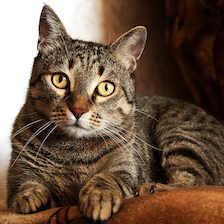

(1, 224, 224, 3)

In [5]:
# VGGNet
from tensorflow import keras
import numpy as np
from PIL import Image
from tensorflow.keras.applications import vgg16

cat_img = Image.open('C:\python_src\deep_learning\cat-dog-images\images\cat.png')
# dog_img = Image.open('C:\python_src\deep_learning\cat-dog-images\images\dog.png')
display(cat_img)
cat_array = np.array(cat_img)

vggnet = keras.applications.VGG16()
vgg_prep_cat =  vgg16.preprocess_input(cat_array)

cat_array[np.newaxis, :].shape  # tensor unsqueeze() 와 동일

In [8]:
# 이미지 파일을 넘파이 배열로 변환
from PIL import Image
import numpy as np
import tensorflow as tf


dog_png = Image.open('C:\python_src\deep_learning\cat-dog-images\images\dog.png')
cat_png = Image.open('C:\python_src\deep_learning\cat-dog-images\images\cat.png')

dog_array = np.array(dog_png)
cat_array = np.array(cat_png)


In [2]:
# 분류 -> shape가 맞지 않아서 맞춰줘야 함
prediction = vggnet.predict(dog_array)
prediction2 = vggnet.predict(cat_array)

NameError: name 'vggnet' is not defined

In [9]:
vgg_prep_dog = tf.keras.applications.vgg16.preprocess_input(dog_array)
vgg_prep_dog.shape
vgg_prep_cat = tf.keras.applications.vgg16.preprocess_input(cat_array)
vgg_prep_cat.shape

(224, 224, 3)

In [10]:
prediction1 = vggnet.predict(vgg_prep_dog[np.newaxis,:])
prediction2 = vggnet.predict(vgg_prep_cat[np.newaxis,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


In [11]:
np.argmax(prediction[0]) , prediction[0][208]

NameError: name 'prediction' is not defined

In [12]:
# 종류 출력 확인 가능
from tensorflow.keras.applications.vgg16 import decode_predictions
print(decode_predictions(prediction1))
print(decode_predictions(prediction2))

[[('n02099712', 'Labrador_retriever', np.float32(0.35698128)), ('n02099601', 'golden_retriever', np.float32(0.14486551)), ('n02104029', 'kuvasz', np.float32(0.092787)), ('n02111500', 'Great_Pyrenees', np.float32(0.069169864)), ('n02106166', 'Border_collie', np.float32(0.056728754))]]
[[('n02123045', 'tabby', np.float32(0.43275332)), ('n02124075', 'Egyptian_cat', np.float32(0.3112799)), ('n02123159', 'tiger_cat', np.float32(0.21606497)), ('n02971356', 'carton', np.float32(0.0035795544)), ('n03223299', 'doormat', np.float32(0.0031308194))]]


In [ ]:
# ResNet
# 층을 깊게 쌓으면 -> 더 복잡한 패턴을 학습
# 네트웍이 깊어지면
    # 기울기 소실 문제(소실/ 폭발)

# Residual Learing 잔차연결
# x -> H(x)
# f(x) = H(x) - x  Residual 잔차를 학습
# 최종 출력 H(x) = f(x) - x     스킵커넥션

In [13]:
# ResNet 모델
import keras
from keras import layers
inputs = layers.Input(shape=(224,224,3))
x = layers.ZeroPadding2D(padding=3)(inputs) # forward와 같은 과정
x = layers.Conv2D(64,kernel_size=7,strides=2)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.ZeroPadding2D(padding=1)(x)
x = layers.MaxPooling2D(pool_size=3,strides=2)(x) 

In [14]:

def residual_block(x, filters, first_stride=1, conv_skip=False):
    skip_conn = x
    x = layers.Conv2D(filters=filters, kernel_size=1,
                      strides=first_stride)(x)
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(filters=filters, kernel_size=3,
                      padding='same')(x)
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(filters=filters*4, kernel_size=1)(x)
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    # conv_skip 이 True이면 1x1 합성곱을 사용해 패널
    if conv_skip == True:
        skip_conn = layers.Conv2D(filters=filters*4, kernel_size=1,
                                  strides=first_stride)(skip_conn)
        skip_conn = layers.BatchNormalization(epsilon=1e-5)(skip_conn)
    x = layers.Add()([skip_conn, x])
    x = layers.Activation('relu')(x)
    return x

In [15]:
# 잔차 스택
def build_stack(x):
    # 첫 번째 잔차스택의 첫번째 잔차 블럭만 스트라이드 1
    x = residual_stack(x, 3, 64, first_stride=1)
    for blocks, filters in [(4, 128), (6, 256), (3, 512)]:
        x = residual_stack(x, blocks, filters, first_stride=2)
    return x

def residual_stack(x, blocks, filters, first_stride=2):
    # 합성곱 스킵커넥션
    x = residual_block(x, filters, first_stride=first_stride, conv_skip=True)
    for _ in range(1, blocks):
        x = residual_block(x, filters, first_stride=1, conv_skip=False)
    return x

In [16]:
# ResNet 모델
x = build_stack(x)
x = layers.GlobalAveragePooling2D()(x)
output = layers.Dense(1000,activation = 'softmax')(x)
model = keras.Model(inputs=inputs, outputs=x)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ activation[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     16,640 │ max_pooling2d[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     16,640 │ activation_2[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ conv2d_3[0][0]  

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [20]:
# 이미지를 넘파이 배열로 모델에 넣으면 된다
from keras.preprocessing.image import load_img, img_to_array
img = load_img('C:\python_src\deep_learning\cat-dog-images\images\cat.png', target_size=(224,224))
X = img_to_array(img)
X = np.expand_dims(X, axis=0)
np.argmax(model.predict(X))
     

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


np.int64(999)

In [22]:

X[np.newaxis, :].shape , np.expand_dims(X, axis=0).shape

((1, 1, 224, 224, 3), (1, 1, 224, 224, 3))